## Ridge and Lasso Regularizarion

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from sklearn.datasets import load_boston #dataset used in Ridge Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer #dataset used in Lasso Regression 
#(breast_cancer dataset contains more features than a Boston dataset - 30 vs 13 - which will allow to see Lasso's feature selection better)
from sklearn.linear_model import Lasso

### Ridge Regression

In [3]:
# Loading Boston dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)

newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 

newY=boston_df['Price']

# creating a linear regression model and 2 ridge regression models (one with alpha = 0.01 and one with alpha = 100)
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ridge Regressions - the higher the alpha value, more restriction on the coefficients
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value of 100
rr100.fit(X_train, y_train)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152 152


Ridge(alpha=100)

In [5]:
# Computing train and test scores
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

# Printing scores
print ("training score: {:.4f}".format(train_score))
print ("testing score: {:.4f}".format(test_score))
print ("ridge training score for alpha = 0.01: {:.4f}".format(Ridge_train_score))
print ("ridge testing score for alpha = 0.01: {:.4f}".format(Ridge_test_score)) #score with small alpha is similar to the linear regression
print ("ridge training score for alpha = 100: {:.4f}".format(Ridge_train_score100))
print ("ridge testing score for alpha = 100: {:.4f}".format(Ridge_test_score100))

training score: 0.7419
testing score: 0.7148
ridge training score for alpha = 0.01: 0.7419
ridge testing score for alpha = 0.01: 0.7146
ridge training score for alpha = 100: 0.7173
ridge testing score for alpha = 100: 0.6806


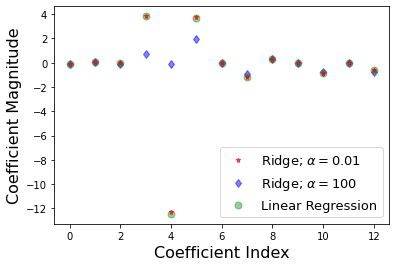

In [6]:
# Plotting results
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost the same
as those of the linear regression. For higher value of α (100), we see that for coefficient indices 3,4, and 5 the magnitudes are considerably less compared to the linear regression case. This is an example of shrinking coefficient magnitudes using Ridge regression.

### Lasso Regression

In [11]:
# Loading cancer dataset
cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#print cancer_df.head(3)

# Creating a linear regression model and 3 lasso models (one with alpha = 1, one with alpha = 0.01, and one with alpha = 0.0001)
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

# Linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("linear regression training score:", lr_train_score )
print ("linear regression test score: ", lr_test_score)

# Lasso model with alpha = 1 (default alpha parameter)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print ("\ntraining score for alpha=1:", train_score )
print ("test score for alpha=1: ", test_score)
print ("number of features used for alpha=1: ", coeff_used) # with a default parameter, only 4 out of 30 features are selected
# both training and testing scores are low - we can conclude that the model is underfitting data

# Lasso model with alpha = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("\ntraining score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used for alpha = 0.01:", coeff_used001) # 10 features are selected
# with alpha = 0.01, both training and testing scores are improving relative to the alpha of 1, and we are using more features

# Lasso model with alpha = 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("\ntraining score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used for alpha = 0.0001:", coeff_used00001) # 22 features are selected
# with alphe = 0.0001, training and testing scores are close to the linear regression (makes sense as alpha parameter is very low)


linear regression training score: 0.784220619405507
linear regression test score:  0.7329325010888693

training score for alpha=1: 0.5600974529893079
test score for alpha=1:  0.5832244618818156
number of features used for alpha=1:  4

training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.6641831577726228
number of features used for alpha = 0.01: 10

training score for alpha=0.0001: 0.7754092006936697
test score for alpha =0.0001:  0.7318608210757909
number of features used for alpha = 0.0001: 22


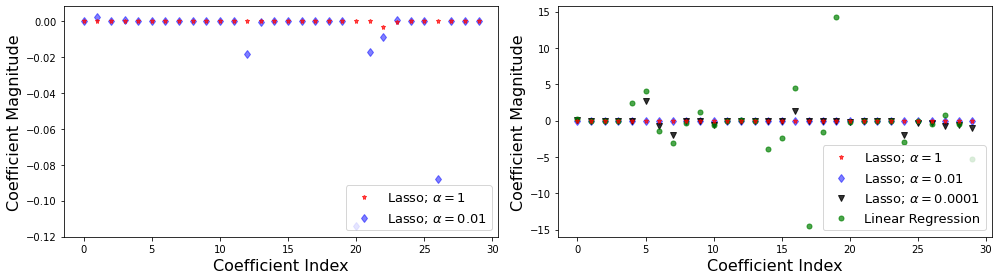

In [21]:
# Plotting results
plt.subplots(2, 1, figsize=(14, 4))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()